In [1]:
import os
os.getpid()

432

In [2]:
from pathlib import Path

import pandas as pd
import numpy as np

from tqdm.auto import tqdm
tqdm.pandas()

import torch
from torch.utils.data import Dataset

In [3]:
df = pd.read_csv('data/NLP_task1/Evaluation-dataset.csv', header=None)

In [4]:
df = df.rename({0: 'review'}, axis=1)
df.sample(2)

,review,1,2,3,4,5,6,7,8,9,10,11,12,13,14
6754,Fast and efficient service,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6106,would buy this product again,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
aspects_df = df.drop('review', axis=1)
aspects_df.sample(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
6313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
labels_series = pd.Series(aspects_df.values.ravel())

<AxesSubplot:>

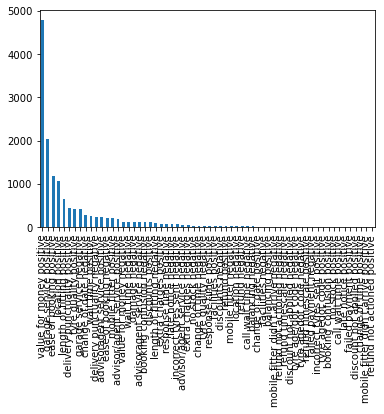

In [7]:
labels_series.value_counts().plot(kind='bar')

In [8]:
labels = sorted(pd.unique(labels_series.dropna()))

In [9]:
len(labels)

62

In [10]:
labels

['advisor/agent service negative',
 'advisor/agent service positive',
 'advisoragent service negative',
 'advisoragent service positive',
 'balancing negative',
 'balancing positive',
 'booking confusion negative',
 'booking confusion positive',
 'call wait time negative',
 'call wait time positive',
 'change of date negative',
 'change of date positive',
 'change of time negative',
 'change of time positive',
 'damage negative',
 'delivery punctuality negative',
 'delivery punctuality positive',
 'discount not applied negative',
 'discount not applied positive',
 'discounts negative',
 'discounts positive',
 'ease of booking negative',
 'ease of booking positive',
 'extra charges negative',
 'extra charges positive',
 'facilities negative',
 'facilities positive',
 'failed payment negative',
 'failed payment positive',
 'garage service negative',
 'garage service positive',
 'incorrect tyres sent negative',
 'incorrect tyres sent positive',
 'late notice negative',
 'late notice posit

In [11]:
label_fix_dct = {
    'advisoragent service negative': 'advisor/agent service negative',
    'advisoragent service positive': 'advisor/agent service positive',
    'tyre agedot code negative': 'tyre age/dot code negative',
}

for k, v in label_fix_dct.items():
    assert k in labels
    assert v in labels

In [12]:
df = df.progress_applymap(lambda x: label_fix_dct.get(x, x))

  0%|          | 0/151980 [00:00<?, ?it/s]

In [13]:
aspects_df = df.drop('review', axis=1)
aspects_df.sample(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
7757,length of fitting positive,ease of booking positive,advisor/agent service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4921,value for money positive,location positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
labels_series = pd.Series(aspects_df.values.ravel())
labels = sorted(pd.unique(labels_series.dropna()))

In [15]:
labels

['advisor/agent service negative',
 'advisor/agent service positive',
 'balancing negative',
 'balancing positive',
 'booking confusion negative',
 'booking confusion positive',
 'call wait time negative',
 'call wait time positive',
 'change of date negative',
 'change of date positive',
 'change of time negative',
 'change of time positive',
 'damage negative',
 'delivery punctuality negative',
 'delivery punctuality positive',
 'discount not applied negative',
 'discount not applied positive',
 'discounts negative',
 'discounts positive',
 'ease of booking negative',
 'ease of booking positive',
 'extra charges negative',
 'extra charges positive',
 'facilities negative',
 'facilities positive',
 'failed payment negative',
 'failed payment positive',
 'garage service negative',
 'garage service positive',
 'incorrect tyres sent negative',
 'incorrect tyres sent positive',
 'late notice negative',
 'late notice positive',
 'length of fitting negative',
 'length of fitting positive',


In [16]:
len(labels)

59

In [17]:
def collate_reviews(rows):
    rows = rows.dropna()
    rows = rows.to_list()
    return rows

In [18]:
aspects = aspects_df.progress_apply(collate_reviews, axis=1)
aspects.sample(2)

  0%|          | 0/10132 [00:00<?, ?it/s]

9582                            []
10108    [garage service positive]
dtype: object

In [19]:
from sklearn.preprocessing import MultiLabelBinarizer

In [20]:
mlb = MultiLabelBinarizer()

In [21]:
mlb.fit(aspects)

MultiLabelBinarizer()

In [22]:
mlb.classes_

array(['advisor/agent service negative', 'advisor/agent service positive',
       'balancing negative', 'balancing positive',
       'booking confusion negative', 'booking confusion positive',
       'call wait time negative', 'call wait time positive',
       'change of date negative', 'change of date positive',
       'change of time negative', 'change of time positive',
       'damage negative', 'delivery punctuality negative',
       'delivery punctuality positive', 'discount not applied negative',
       'discount not applied positive', 'discounts negative',
       'discounts positive', 'ease of booking negative',
       'ease of booking positive', 'extra charges negative',
       'extra charges positive', 'facilities negative',
       'facilities positive', 'failed payment negative',
       'failed payment positive', 'garage service negative',
       'garage service positive', 'incorrect tyres sent negative',
       'incorrect tyres sent positive', 'late notice negative',
       

In [23]:
num_labels = len(mlb.classes_)
num_labels

59

In [167]:
trans_aspects = mlb.transform(aspects)

In [168]:
pd.Series(mlb.inverse_transform(trans_aspects))

0        (ease of booking positive, garage service posi...
1        (garage service positive, value for money posi...
2                              (value for money positive,)
3                              (ease of booking positive,)
4        (ease of booking positive, location positive, ...
                               ...                        
10127    (delivery punctuality positive, refund positiv...
10128                        (length of fitting positive,)
10129    (delivery punctuality positive, length of fitt...
10130                                                   ()
10131                                                   ()
Length: 10132, dtype: object

In [169]:
aspects

0        [garage service positive, ease of booking posi...
1        [garage service positive, value for money posi...
2                               [value for money positive]
3                               [ease of booking positive]
4        [location positive, value for money positive, ...
                               ...                        
10127    [refund positive, delivery punctuality positiv...
10128                         [length of fitting positive]
10129    [location positive, delivery punctuality posit...
10130                                                   []
10131                                                   []
Length: 10132, dtype: object

In [170]:
(aspects.apply(set) == pd.Series(mlb.inverse_transform(trans_aspects)).apply(set)).all()

True

In [171]:
trans_aspects.shape

(10132, 59)

In [172]:
trans_aspects = torch.tensor(trans_aspects, dtype=torch.float32)

In [173]:
trans_aspects.shape

torch.Size([10132, 59])

In [174]:
df['y'] = list(trans_aspects)

In [178]:
df['y'].apply(lambda x: x.shape)

0        (59,)
1        (59,)
2        (59,)
3        (59,)
4        (59,)
         ...  
10127    (59,)
10128    (59,)
10129    (59,)
10130    (59,)
10131    (59,)
Name: y, Length: 10132, dtype: object

In [179]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer, TrainingArguments, Trainer

In [ ]:
db_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
db_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', 
                                                               num_labels=num_labels,
                                                              problem_type='multi_label_classification')

In [183]:
df['review']

0        Tires where delivered to the garage of my choi...
1        Easy Tyre Selection Process, Competitive Prici...
2               Very easy to use and good value for money.
3                    Really easy and convenient to arrange
4        It was so easy to select tyre sizes and arrang...
                               ...                        
10127    I ordered the wrong tyres, however [REDACTED] ...
10128    Good experience, first time I have used [REDAC...
10129    I ordered the tyre I needed on line, booked a ...
10130    Excellent service from point of order to fitti...
10131    Seamless, well managed at both ends. I would r...
Name: review, Length: 10132, dtype: object

In [184]:
%%time
df['x'] = df['review'].progress_apply(lambda x: db_tokenizer(x, padding='max_length', truncation=True))
# df['x'] = db_tokenizer(df['review'].to_list(), truncation=True, padding=True)

  0%|          | 0/10132 [00:00<?, ?it/s]

CPU times: user 4.28 s, sys: 25.6 ms, total: 4.31 s
Wall time: 4.27 s


In [185]:
df['x'] = df['x'].progress_apply(lambda x: {k: torch.tensor(v, dtype=torch.int64) for k, v in x.items()})

  0%|          | 0/10132 [00:00<?, ?it/s]

In [186]:
df['x'].apply(lambda x: x['input_ids'].shape[0]).describe()

count    10132.0
mean       512.0
std          0.0
min        512.0
25%        512.0
50%        512.0
75%        512.0
max        512.0
Name: x, dtype: float64

In [187]:
df[['x', 'y']].sample(2)

,x,y
7658,"{'input_ids': [tensor(101), tensor(2467), tens...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
4353,"{'input_ids': [tensor(101), tensor(3722), tens...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."


In [188]:
class SentisumDataset(Dataset):
    def __init__(self, df):
        self.df = df
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        x, y = self.df.iloc[idx][['x', 'y']]
#         ans = {k: torch.tensor(v, dtype=torch.int64) for k, v in x.items()}
        x['labels'] = y
        return x

In [189]:
df['y'].apply(type)

0        <class 'torch.Tensor'>
1        <class 'torch.Tensor'>
2        <class 'torch.Tensor'>
3        <class 'torch.Tensor'>
4        <class 'torch.Tensor'>
                  ...          
10127    <class 'torch.Tensor'>
10128    <class 'torch.Tensor'>
10129    <class 'torch.Tensor'>
10130    <class 'torch.Tensor'>
10131    <class 'torch.Tensor'>
Name: y, Length: 10132, dtype: object

In [190]:
mlb.inverse_transform(df['y'].iloc[0].reshape(1, -1))

[('ease of booking positive', 'garage service positive')]

In [199]:
def my_data_collator(samples):
    keys = samples[0].keys()
    batch = {}

    for key in keys:
        batch[key] = torch.stack([s[key] for s in samples])
    return batch

In [200]:
from sklearn.model_selection import train_test_split

In [201]:
idxs = df.index.to_numpy()
train_idxs, val_idxs = train_test_split(idxs)
len(train_idxs), len(val_idxs)

(7599, 2533)

In [202]:
train_ds = SentisumDataset(df.loc[train_idxs])
val_ds = SentisumDataset(df.loc[val_idxs])

In [203]:
train_args = TrainingArguments(output_dir='models/distilbert-base',
                                label_names=mlb.classes_,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [204]:
trainer = Trainer(model=db_model, 
                  args=train_args,
                  data_collator=my_data_collator,
                  train_dataset=train_ds, 
                  eval_dataset=val_ds)

In [207]:
torch.cuda.is_available()

False

In [208]:
torch.__version__

'1.8.1'

In [206]:
trainer.train()

***** Running training *****
  Num examples = 7599
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 2850


Step,Training Loss


KeyboardInterrupt: 